In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
mh_df = pd.read_csv('data/cleaned_data/mh_cleaned.csv')
gs_df = pd.read_csv("data/cleaned_data/greenspace_cleaned.csv")

df = pd.read_csv("data/cleaned_data/merged_cleaned_data.csv")

In [76]:
df.shape

(137, 43)

In [77]:
df.head()

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS
0,1,99553,15.000000,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,...,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,93637.93791,2023.651685,971.540023
1,2,88410,11.100000,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,...,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,76532.32110,1586.268293,964.054300
2,3,150441,14.700000,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,...,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,61865.95980,1336.129870,934.402858
3,4,197899,13.600000,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,...,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,33285.93555,2010.400000,1270.712543
4,5,3294906,9.992308,9,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,...,CA,San Jose,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific,168736.21400,4863.766667,2051.496433


In [78]:
categorical_df = df.select_dtypes(include=['object', 'category'])

categorical_df.head()

,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division
0,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific
1,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific
2,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific
3,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific
4,CA,San Jose,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific


In [79]:
non_categorical_df = df.select_dtypes(exclude=['object', 'category'])
#non_categorical_df.drop(columns=['UC_Grouping','Unnamed: 0'], inplace=True)
non_categorical_df.head()

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,PopulationDelta,PopDensity_MH,PopDensity_GS
0,1,99553,15.000000,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,...,3.014213,0.047215,11.6309,0.040129,23.64,0.481144,2.79174,93637.93791,2023.651685,971.540023
1,2,88410,11.100000,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,...,3.263458,0.013192,13.8037,0.061348,36.50,0.556762,4.25502,76532.32110,1586.268293,964.054300
2,3,150441,14.700000,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,...,6.895041,0.059792,12.3763,0.076114,24.61,0.843804,11.39150,61865.95980,1336.129870,934.402858
3,4,197899,13.600000,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,...,16.894830,0.072824,17.0109,0.036199,28.65,0.435584,NaN,33285.93555,2010.400000,1270.712543
4,5,3294906,9.992308,9,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,...,388.799335,0.561288,11.9947,0.042397,23.88,0.271644,3.80059,168736.21400,4863.766667,2051.496433


In [80]:
df.columns

Index(['Unnamed: 0', 'MH_Population', 'MH_Score', 'UC_Grouping',
       'Urban Center Area', 'Latitude', 'Longitude', 'Avg Elevation',
       'Avg Precipitation', 'Avg Temp', 'Avg Greenness', 'Total Green Area',
       'Population', 'Total Built-up Area', 'Built-up Area per capita',
       'Avg Nighttime Light Emission', 'Sum of GDP', 'TCNSCE Residential',
       'TCNSCE Industry', 'TCNSCE Transport', 'TCNSCE Agriculture',
       'TCSCOE Residential', 'TCSCOE Industry', 'TCSCOE Agriculture',
       'Particulate Matter Emissions Residential',
       'Particulate Matter Emissions Industry',
       'Particulate Matter Emissions Transport',
       'Particulate Matter Emissions Agriculture',
       'Total Concertation of Particulate Matter',
       '% of Pop in High Green Area', '% of Open Spaces',
       'Land Use Efficiency', 'Max Magnitude of Heatwaves', 'State',
       'Urban Center', 'Biome', 'Soil Group', 'Cities in Urban Center_copy',
       'Region', 'Division', 'PopulationDelta', '

(array([ 6., 10., 16., 29., 17., 23., 19.,  8.,  4.,  5.]),
 array([ 8.7 ,  9.66, 10.62, 11.58, 12.54, 13.5 , 14.46, 15.42, 16.38,
        17.34, 18.3 ]),
 <BarContainer object of 10 artists>)

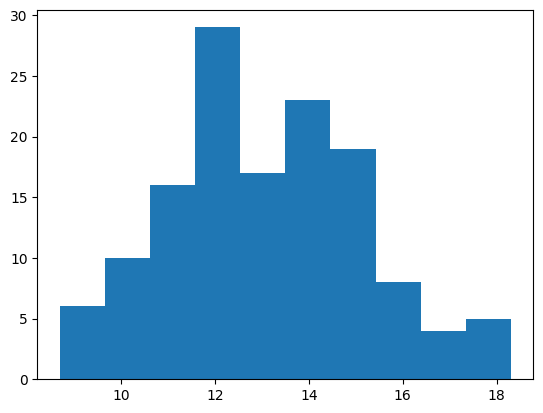

In [81]:
plt.hist(x = df['MH_Score'])

#seems to follow normal distribution

(array([130.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.50797978e+09, 6.89109818e+10, 1.36313984e+11, 2.03716986e+11,
        2.71119988e+11, 3.38522990e+11, 4.05925992e+11, 4.73328994e+11,
        5.40731996e+11, 6.08134998e+11, 6.75538000e+11]),
 <BarContainer object of 10 artists>)

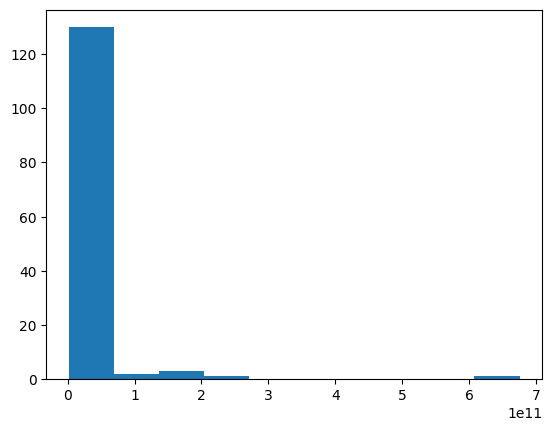

In [82]:
plt.hist(x = df['Sum of GDP'])

<Axes: xlabel='count', ylabel='State'>

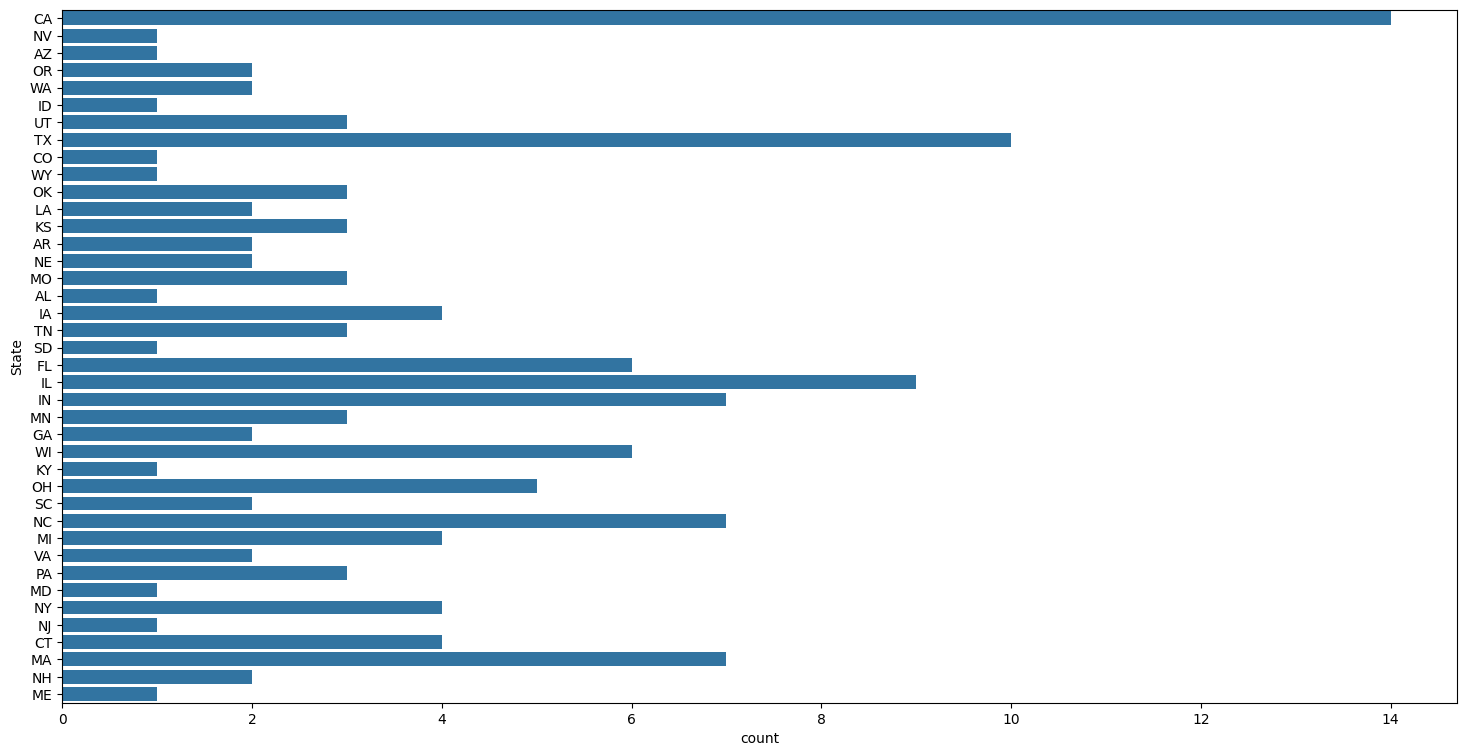

In [83]:
plt.figure(figsize=(18, 9))
sns.countplot(df['State'])

#some states only have 1 or 2 entries in dataset

In [84]:
highest_mh_rows = df[df['MH_Score'] == df['MH_Score'].max()]
lowest_mh_rows = df[df['MH_Score'] == df['MH_Score'].min()]

highest_mh_rows
#New Bedford, MA highest score of 18.3
lowest_mh_rows
#Cary, NC lowest score of 8.7

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS
107,184,135234,8.7,767,72.0,35.795852,-78.812808,125.804054,1260.400024,16.048518,...,NC,Cary,Temperate Broadleaf and Mixed Forests,Acrisols,Cary,South,South Atlantic,32804.71715,2649.627907,1886.727508


In [85]:
top_5_highest_mh = df.sort_values(by='MH_Score', ascending=False).head(5)

top_5_lowest_mh = df.sort_values(by='MH_Score', ascending=True).head(5)

top_5_highest_mh
# New Bedford, MA / Fall River, MA / Springfield, MA/ Flint, MI/ Reading, PA     #Scores from 17.4 to 18.3, Top 10 states include MA, MI, PA, OH, TN

#top_5_lowest_mh
#Cary, NC / Roswell, GA / Rochester, MN/ Washington DC / Fargo, ND  #Score from 8.7 to 9.2,  Top 10 states are more diverse include NC, GA, MN, DC, ND, HI, CO, SD, NE #interesting nugget

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS
130,220,95072,18.3,1019,87.0,41.637348,-70.919854,13.189274,1208.674988,11.368393,...,MA,New Bedford,Temperate Broadleaf and Mixed Forests,Podzols,New Bedford,Northeast,New England,108650.43120,729.497487,1275.479554
129,219,88857,18.2,1015,77.0,41.715207,-71.155436,27.095976,1190.825012,11.264272,...,MA,Fall River,Temperate Broadleaf and Mixed Forests,Podzols,Fall River,Northeast,New England,24929.14059,1349.693878,1858.451849
127,216,153060,17.5,1003,160.0,42.146355,-72.568555,59.446226,1184.725037,9.893815,...,MA,Springfield,Temperate Broadleaf and Mixed Forests,Podzols,Springfield,Northeast,New England,354525.92180,604.884259,1425.546115
118,203,88082,17.4,899,114.0,40.344255,-75.940186,108.455244,1274.050049,11.232865,...,PA,Reading,Temperate Broadleaf and Mixed Forests,Luvisols,Reading,Northeast,Middle Atlantic,156059.68200,1007.285714,1391.669167
109,188,102434,17.4,776,151.0,43.011171,-83.702089,235.902445,794.050018,8.921534,...,MI,Flint,Temperate Broadleaf and Mixed Forests,Luvisols,Flint,Midwest,East North Central,199067.44970,608.543689,1252.774918


In [86]:
#df[df['Urban Center'] == 'Washington D.C.']

In [87]:
#df.loc[df['Urban Center'] == 'Washington D.C.', 'State'] = 'DC'

In [88]:
#df[df['Urban Center'] == 'Washington D.C.']

In [89]:
state_counts = df['State'].value_counts() 
state_counts

State
CA    14
TX    10
IL     9
MA     7
NC     7
IN     7
WI     6
FL     6
OH     5
CT     4
MI     4
IA     4
NY     4
MN     3
OK     3
KS     3
MO     3
TN     3
PA     3
UT     3
OR     2
SC     2
WA     2
GA     2
NH     2
NE     2
AR     2
LA     2
VA     2
NJ     1
AZ     1
MD     1
CO     1
KY     1
WY     1
ID     1
NV     1
SD     1
AL     1
ME     1
Name: count, dtype: int64

In [90]:
df['UCs in State'] = df['State'].map(state_counts)
df.head(2)

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS,UCs in State
0,1,99553,15.0,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,...,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,93637.93791,2023.651685,971.540023,14
1,2,88410,11.1,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,...,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,76532.32110,1586.268293,964.054300,14


In [91]:
labels = ['Scarce Data (1-3)', 'Some Data (4-5)', 'Moderate Data (6-9)',  'Data Rich (11-35)'] # States with counts between  3-1, 5- 4, 9-6, 35-11
df['State UC Data'] = pd.cut(df['UCs in State'], bins=[0, 3, 5, 9, 36], labels=labels, right=False)

In [92]:
df.head()

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS,UCs in State,State UC Data
0,1,99553,15.000000,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,...,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,93637.93791,2023.651685,971.540023,14,Data Rich (11-35)
1,2,88410,11.100000,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,...,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,76532.32110,1586.268293,964.054300,14,Data Rich (11-35)
2,3,150441,14.700000,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,...,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,61865.95980,1336.129870,934.402858,14,Data Rich (11-35)
3,4,197899,13.600000,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,...,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,33285.93555,2010.400000,1270.712543,14,Data Rich (11-35)
4,5,3294906,9.992308,9,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,...,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific,168736.21400,4863.766667,2051.496433,14,Data Rich (11-35)


In [93]:
categorical_df = df.select_dtypes(include=['object', 'category'])

categorical_df.head()

,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,State UC Data
0,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,Data Rich (11-35)
1,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,Data Rich (11-35)
2,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,Data Rich (11-35)
3,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,Data Rich (11-35)
4,CA,San Jose,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific,Data Rich (11-35)


In [94]:
non_categorical_df = df.select_dtypes(exclude=['object', 'category'])
non_categorical_df.drop(columns=['Unnamed: 0', 'MH_Population', 'UC_Grouping', 'PopulationDelta', 'PopDensity_MH','PopDensity_GS'], inplace=True)
non_categorical_df.head()

,MH_Score,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,Total Green Area,Population,...,Particulate Matter Emissions Residential,Particulate Matter Emissions Industry,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,UCs in State
0,15.000000,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,54.450694,1.231813e+05,...,8.503971,35.140393,3.014213,0.047215,11.6309,0.040129,23.64,0.481144,2.79174,14
1,11.100000,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,59.576284,1.147532e+05,...,14.048873,30.528288,3.263458,0.013192,13.8037,0.061348,36.50,0.556762,4.25502,14
2,14.700000,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,53.886276,1.497843e+05,...,16.569708,65.973825,6.895041,0.059792,12.3763,0.076114,24.61,0.843804,11.39150,14
3,13.600000,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,135.224578,2.978064e+05,...,30.233594,118.460613,16.894830,0.072824,17.0109,0.036199,28.65,0.435584,NaN,14
4,9.992308,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,0.306727,1713.386499,4.604961e+06,...,350.646315,3702.020152,388.799335,0.561288,11.9947,0.042397,23.88,0.271644,3.80059,14


In [95]:
non_categorical_df.columns

Index(['MH_Score', 'Urban Center Area', 'Latitude', 'Longitude',
       'Avg Elevation', 'Avg Precipitation', 'Avg Temp', 'Avg Greenness',
       'Total Green Area', 'Population', 'Total Built-up Area',
       'Built-up Area per capita', 'Avg Nighttime Light Emission',
       'Sum of GDP', 'TCNSCE Residential', 'TCNSCE Industry',
       'TCNSCE Transport', 'TCNSCE Agriculture', 'TCSCOE Residential',
       'TCSCOE Industry', 'TCSCOE Agriculture',
       'Particulate Matter Emissions Residential',
       'Particulate Matter Emissions Industry',
       'Particulate Matter Emissions Transport',
       'Particulate Matter Emissions Agriculture',
       'Total Concertation of Particulate Matter',
       '% of Pop in High Green Area', '% of Open Spaces',
       'Land Use Efficiency', 'Max Magnitude of Heatwaves', 'UCs in State'],
      dtype='object')

In [96]:
spearcorr = non_categorical_df.corr(method='spearman')['MH_Score'].drop('MH_Score')
spearcorr.head(10)

Urban Center Area      0.036559
Latitude               0.015759
Longitude              0.394993
Avg Elevation         -0.314725
Avg Precipitation      0.317002
Avg Temp               0.047531
Avg Greenness          0.151234
Total Green Area       0.036273
Population             0.043668
Total Built-up Area    0.044410
Name: MH_Score, dtype: float64

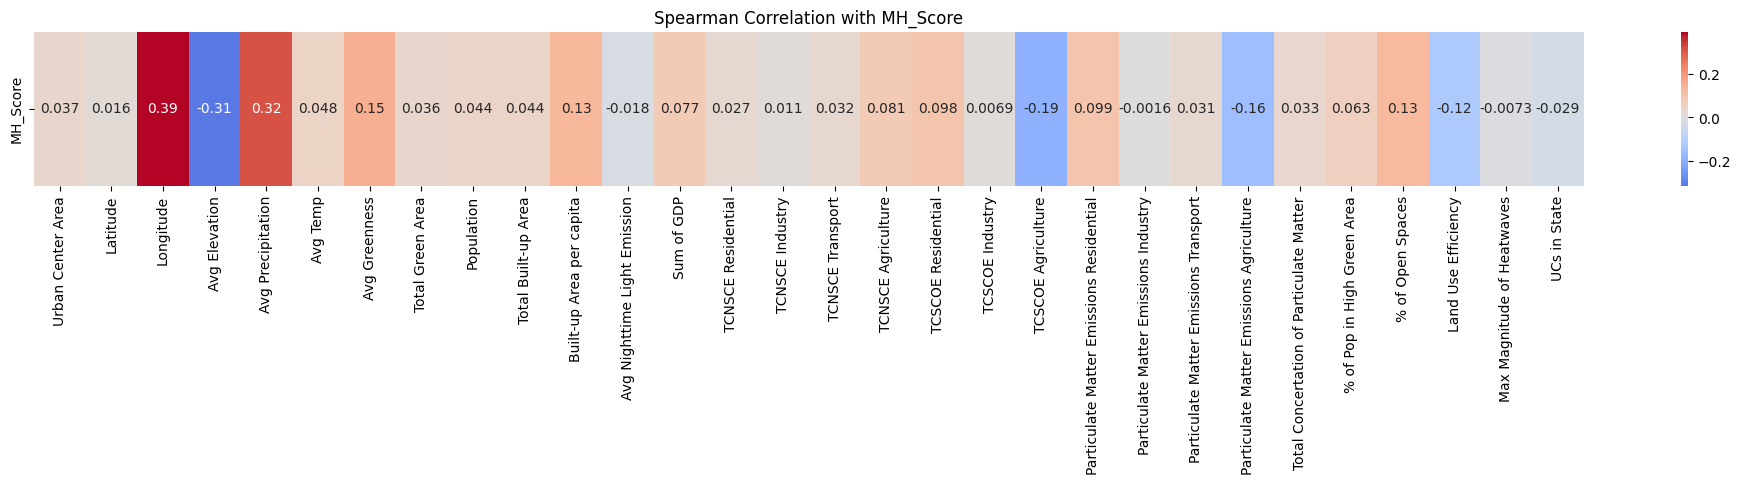

In [97]:
spcorr = spearcorr.to_frame().T

plt.figure(figsize=(25, 2))
sns.heatmap(spcorr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation with MH_Score')
plt.show()

#average greenness made MH worse, total greenness made MH better in the old EDA, now total greenness has no correlation

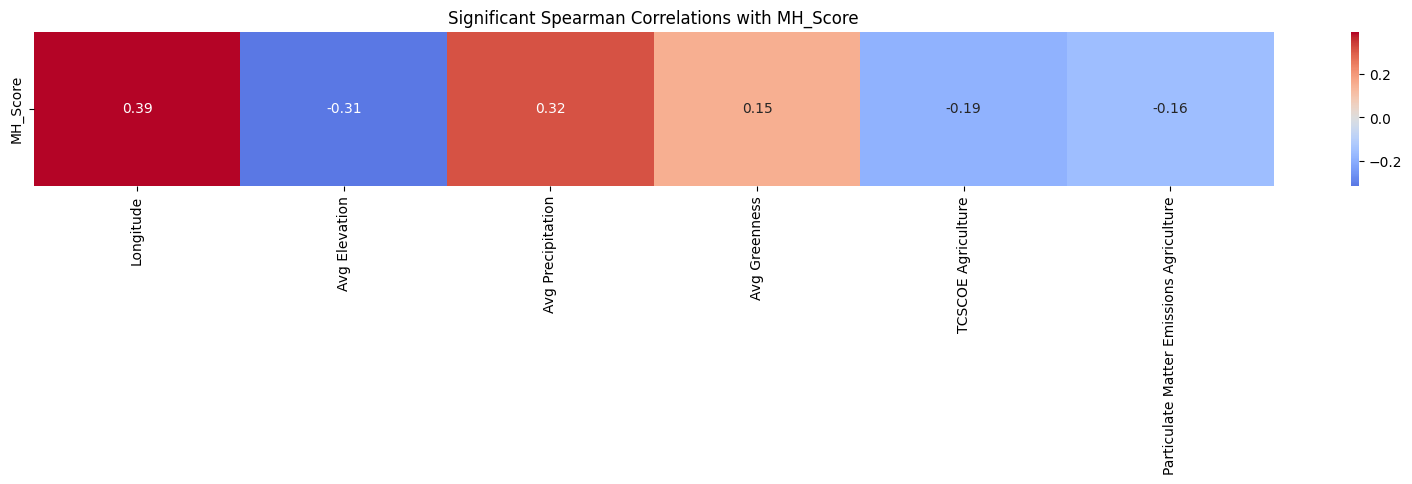

In [98]:
bthreshold = -0.15
tthreshold = 0.15

ssignicorr = spearcorr[(spearcorr < bthreshold) | (spearcorr > tthreshold)]

ssignicorr2 = ssignicorr.to_frame().T

if not ssignicorr2.empty:
    plt.figure(figsize=(20, 2))
    sns.heatmap(ssignicorr2, annot=True, cmap='coolwarm', center=0)
    plt.title('Significant Spearman Correlations with MH_Score')
    plt.show()
else:
    print("No significant correlations found")

In [99]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corrcateg = cramers_v(df['MH_Score'], df['Cities in Urban Center_copy'])
corrcateg 
#0.29 for Biome vs MH, 0.09 for Division, 0.08 for Region 0 for state, 0 for soil
#Highest corr for Biome 

0.0

In [100]:
from scipy.stats import f_oneway


#ANOVA b/w numerical and categorical variable
f_statistic, p_value = f_oneway(*(df[df['State'] == state]['MH_Score'] for state in df['State'].unique()))

print("F-statistic:", f_statistic)
print("P-value:", p_value)

#The small pval indicates strong evidence against the null hypothesis, 
# suggesting that there is a significant difference in the means of MH_Score across different categories of State. 
# aka there is a correlation between MH_Score and State.

F-statistic: 4.514447250777042
P-value: 8.973398427893025e-10


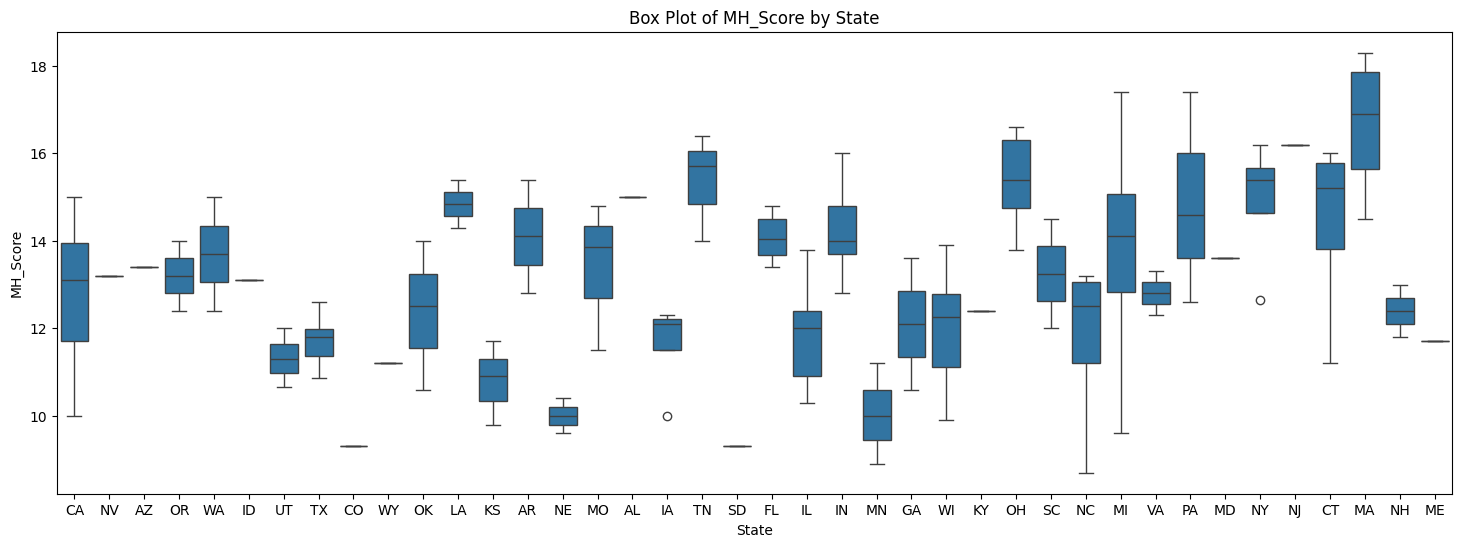

In [101]:
#State

plt.figure(figsize=(18, 6))
sns.boxplot(x='State', y='MH_Score', data=df) 
plt.title('Box Plot of MH_Score by State')
plt.xlabel('State')
plt.ylabel('MH_Score')
plt.show()

In [102]:
#ANOVA Biome
# 
f_statistic, p_value = f_oneway(*(df[df['Biome'] == biome]['MH_Score'] for biome in df['Biome'].unique()))

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 7.609678753983189
P-value: 2.6383246755023414e-06


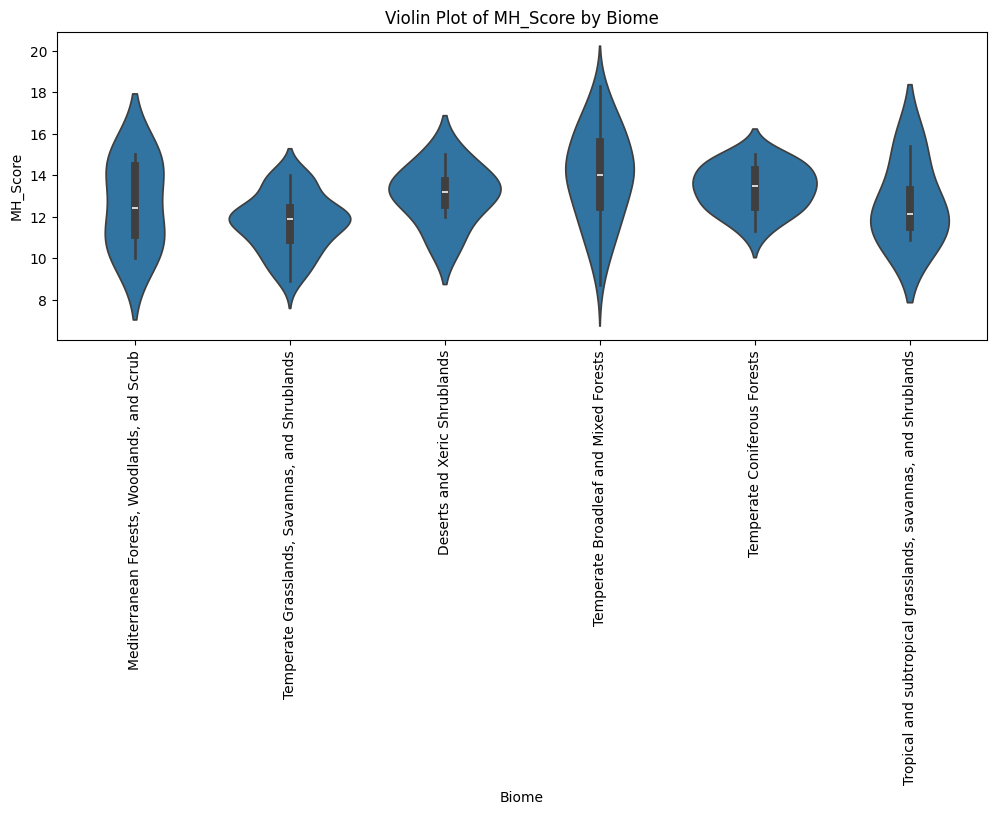

In [103]:
#By biome

plt.figure(figsize=(12, 4))
sns.violinplot(x='Biome', y='MH_Score', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of MH_Score by Biome')
plt.xlabel('Biome')
plt.ylabel('MH_Score')
plt.show()

In [104]:
f_statistic, p_value = f_oneway(*(df[df['Soil Group'] == soil]['MH_Score'] for soil in df['Soil Group'].unique()))

print("F-statistic:", f_statistic)
print("P-value:", p_value)



F-statistic: 3.1641601782138142
P-value: 0.0002963299087020515


In [105]:
categorical_df.columns

Index(['State', 'Urban Center', 'Biome', 'Soil Group',
       'Cities in Urban Center_copy', 'Region', 'Division', 'State UC Data'],
      dtype='object')

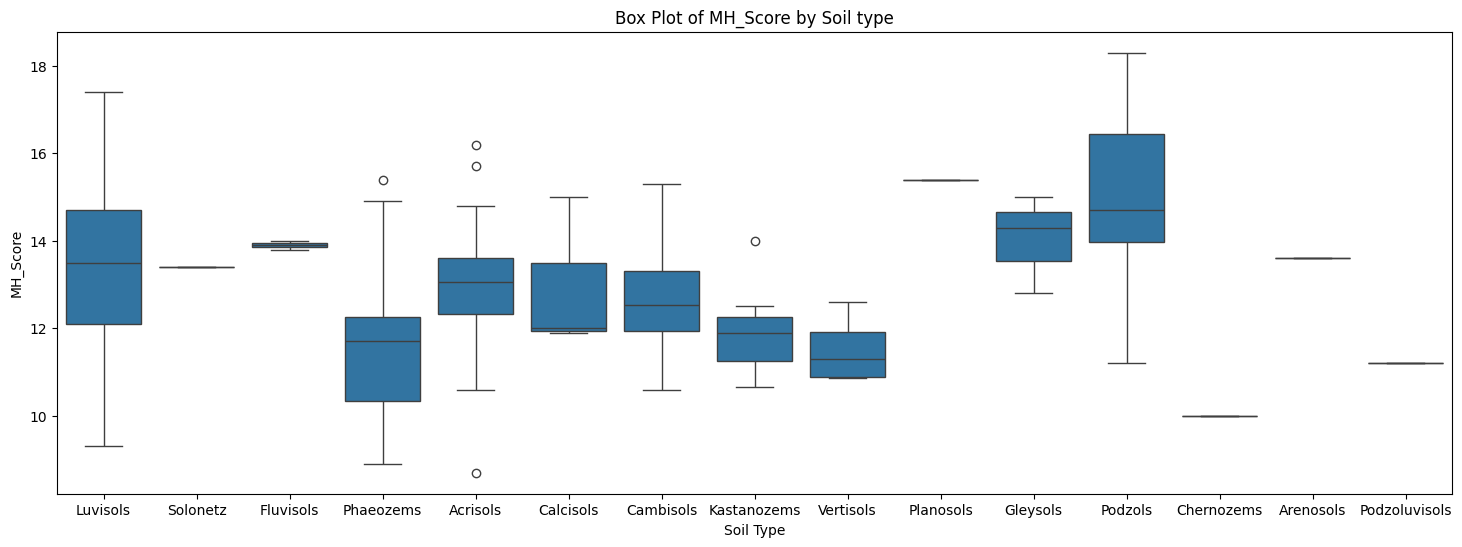

In [106]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Soil Group', y='MH_Score', data=df)
plt.title('Box Plot of MH_Score by Soil type')
plt.xlabel('Soil Type')
plt.ylabel('MH_Score')
plt.show()

In [107]:
#now need to find most similar city - this can be similar city data (biome, gdp, etc) or similar MH metrics and compare the cities

In [108]:
!pip install scikit-learn

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [110]:
print(ssignicorr.index)
print(df.columns)

Index(['Longitude', 'Avg Elevation', 'Avg Precipitation', 'Avg Greenness',
       'TCSCOE Agriculture', 'Particulate Matter Emissions Agriculture'],
      dtype='object')
Index(['Unnamed: 0', 'MH_Population', 'MH_Score', 'UC_Grouping',
       'Urban Center Area', 'Latitude', 'Longitude', 'Avg Elevation',
       'Avg Precipitation', 'Avg Temp', 'Avg Greenness', 'Total Green Area',
       'Population', 'Total Built-up Area', 'Built-up Area per capita',
       'Avg Nighttime Light Emission', 'Sum of GDP', 'TCNSCE Residential',
       'TCNSCE Industry', 'TCNSCE Transport', 'TCNSCE Agriculture',
       'TCSCOE Residential', 'TCSCOE Industry', 'TCSCOE Agriculture',
       'Particulate Matter Emissions Residential',
       'Particulate Matter Emissions Industry',
       'Particulate Matter Emissions Transport',
       'Particulate Matter Emissions Agriculture',
       'Total Concertation of Particulate Matter',
       '% of Pop in High Green Area', '% of Open Spaces',
       'Land Use Efficie

In [111]:
#excluding state, long, lat, biome, city, name

#signicols= ['Avg Elevation', 'Avg Precipitation', 'Avg Greenness', '% of Pop in High Green Area', '% of Open Spaces']

signicols = ['Population','Sum of GDP', 'Avg Elevation', 'Avg Precipitation', 'Avg Greenness', '% of Pop in High Green Area', '% of Open Spaces']

#signicols = ['Population','Sum of GDP']

df[signicols].head()

,Population,Sum of GDP,Avg Elevation,Avg Precipitation,Avg Greenness,% of Pop in High Green Area,% of Open Spaces
0,1.231813e+05,4.174295e+09,87.128092,245.175001,0.312846,0.040129,23.64
1,1.147532e+05,4.159702e+09,38.298095,183.925007,0.362785,0.061348,36.50
2,1.497843e+05,4.813837e+09,21.308919,324.925007,0.339631,0.076114,24.61
3,2.978064e+05,1.074582e+10,21.899179,238.675003,0.299903,0.036199,28.65
4,4.604961e+06,1.760590e+11,41.404357,354.375004,0.306727,0.042397,23.88


In [112]:
scaler = StandardScaler()
df[signicols] = scaler.fit_transform(df[signicols])
df[signicols].head()

,Population,Sum of GDP,Avg Elevation,Avg Precipitation,Avg Greenness,% of Pop in High Green Area,% of Open Spaces
0,-0.274824,-0.249131,-0.480500,-1.969760,-2.244617,-1.879162,-1.815850
1,-0.279983,-0.249352,-0.632999,-2.134414,-1.574821,-1.802291,-1.177477
2,-0.258538,-0.239460,-0.686057,-1.755373,-1.885371,-1.748799,-1.767699
3,-0.167919,-0.149761,-0.684213,-1.987234,-2.418205,-1.893402,-1.567152
4,2.468900,2.349980,-0.623298,-1.676205,-2.326679,-1.870947,-1.803936


In [113]:
#calc euclid dist
def eucliddist(uc1, uc2):
    uc1data = df[df['Urban Center'] == uc1]
    uc2data = df[df['Urban Center'] == uc2]
    uc1feats = uc1data[signicols].values.flatten()
    uc2feats = uc2data[signicols].values.flatten()
    print(uc1feats.shape, uc2feats.shape)
    #return np.sqrt(np.sum((uc1feats-uc2feats)**2))

    if uc1feats.shape != uc2feats.shape:
        print(f"shapes mismatch for {uc1} and {uc2}")
        return np.inf
    return np.linalg.norm(uc1feats - uc2feats)

In [114]:
#calc similarity
def calcsimilar(inputuc):
    sims = {}
    for uc in df['Urban Center']:
    #for uc in df['UC Grouping']  #use iloc to get index to get urban center for that UC
        if uc != inputuc:
            sim = eucliddist(inputuc, uc)
            sims[uc] = sim
    return sims

In [115]:
#knn closest
def findclosestucs(inputuc, k=1):
    sims = calcsimilar(inputuc)
    sortedsims = sorted(sims.items(), key=lambda x: x[1])
    closestucs = sortedsims[:k]
    return closestucs

In [116]:
testuc = 'New Bedford'
closestucs = findclosestucs(testuc, k=5)


print(f"The closest ucs to {testuc} are:")
for uc, similarity in closestucs:
    print(f"{uc} (Similarity: {similarity})")

(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (14,)
shapes mismatch for New Bedford and Portland
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (14,)
shapes mismatch for New Bedford and Lawrence
(7,) (7,)
(7,) (7,)
(7,) (21,)
shapes mismatch for New Bedford and Springfield
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (21,)
shapes mismatch for New Bedford and Springfield
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (14,)
shapes mismatch for New Bedford and Bloomington
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (7,)
(7,) (14,)
shapes mismatch for 

In [118]:
df[df['Urban Center'] == 'Fall River']['MH_Score']

129    18.2
Name: MH_Score, dtype: float64